# Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
PATH = "data"
train = pd.read_csv(os.path.join(PATH, "train.csv"))
test = pd.read_csv(os.path.join(PATH, "test.csv"))

# Data Statistics

In [3]:
train.head()

,ID,text,label
0,TXT00000,RT Semua histeris! Puluhan ribu masyarakat Min...,Politik
1,TXT00001,"Prabowo, pahlawan tanpa tanda jasa yang selalu...",Politik
2,TXT00002,"Usai Debat, Prabowo Kecewa dengan Narasi Anies...",Pertahanan dan Keamanan
3,TXT00003,"RT ""Di belakang kita ini banyak tongkang batub...",Sosial Budaya
4,TXT00004,RT Pungli tak dapat berkembang di bawah kendal...,Politik


In [4]:
test.head()

,ID,text
0,TXT04000,Hebat!! Disabilitas &amp; Emak-emak Deklarasi ...
1,TXT04001,yang gua khawatirkan ini biaya kampanye amin d...
2,TXT04002,Perlindungan hak pekerja migran adalah misi ke...
3,TXT04003,emang cuma calon ini yang peduli sama petani d...
4,TXT04004,"RT Ini bukan cerita tentang Ganjar Mahfud, ini..."


## Target Distribution

In [5]:
train['label'].value_counts()

label
Politik                    2378
Sosial Budaya               470
Pertahanan dan Keamanan     320
Ideologi                    320
Ekonomi                     294
Sumber Daya Alam            153
Demografi                    49
Geografi                     16
Name: count, dtype: int64

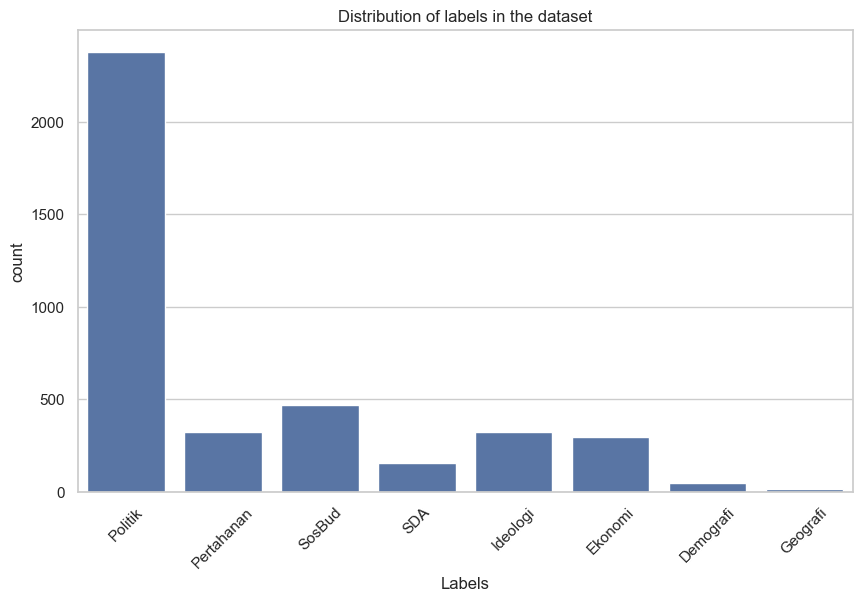

In [47]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.countplot(x=train["label"])
plt.title("Distribution of labels in the dataset")
plt.xlabel("Labels")
plt.xticks(labels=["Politik","Pertahanan","SosBud","SDA","Ideologi","Ekonomi","Demografi","Geografi"],ticks=[i for i in range(0,8)],rotation=45)
plt.show()

# Label Text Samples

In [6]:
for label in train['label'].unique():
    display(train[train['label']==label].head())

,ID,text,label
0,TXT00000,RT Semua histeris! Puluhan ribu masyarakat Min...,Politik
1,TXT00001,"Prabowo, pahlawan tanpa tanda jasa yang selalu...",Politik
4,TXT00004,RT Pungli tak dapat berkembang di bawah kendal...,Politik
6,TXT00006,"RT Tim hukum Ganjar Mahfud bicara, bahwa sehar...",Politik
7,TXT00007,RT @qXDO3RatzAyezAxEWNT0h+YgroGl0x8Zl1AiuIjeod...,Politik


,ID,text,label
2,TXT00002,"Usai Debat, Prabowo Kecewa dengan Narasi Anies...",Pertahanan dan Keamanan
14,TXT00014,RT Relawan Ganjar Dicekoki Miras hingga Dikasi...,Pertahanan dan Keamanan
16,TXT00016,RT Ã¢Â€ÂœBentrok antara warga dengan pendukung...,Pertahanan dan Keamanan
22,TXT00022,RT Ganjar Pranowo-Mahfud MD menekankan penting...,Pertahanan dan Keamanan
23,TXT00023,Kepemimpinan Mas Ganjar Pranowo dan Pak Mahfud...,Pertahanan dan Keamanan


,ID,text,label
3,TXT00003,"RT ""Di belakang kita ini banyak tongkang batub...",Sosial Budaya
5,TXT00005,RT Apa khabar kau Abah. Saya tak tahu nama pen...,Sosial Budaya
9,TXT00009,RT bro keren bgt pak anies bilang kalo pak sua...,Sosial Budaya
25,TXT00025,@/wFEkhYeQYTKA4VP4JIyYv/bsfEP+8JzaLTkH8cyNGU= ...,Sosial Budaya
30,TXT00030,@wDANl+Ol2yJyTvcwKOYVjzt1G157dhr2UhDYP4Si9so= ...,Sosial Budaya


,ID,text,label
8,TXT00008,RT Janji Pak Anies pada Masyarakat Sumatera Ba...,Sumber Daya Alam
28,TXT00028,@ZEtlzKevXBLY8NCcxYq1V1ut2Ha+92wgFYmQ5ZC/uYc= ...,Sumber Daya Alam
46,TXT00046,pak anies tolong ijinin shopee cina jualan lg,Sumber Daya Alam
48,TXT00048,RT Anies pilih atasi stunting dengan ikan dari...,Sumber Daya Alam
54,TXT00054,RT Viral! Prihatin Dengan Kelangkaan Pupuk di ...,Sumber Daya Alam


,ID,text,label
11,TXT00011,#PilpresIndonesia2024 pilihanku sudah jelas ! ...,Ideologi
27,TXT00027,Calon Presiden RI No Urut 3 Ganjar Pranowo ing...,Ideologi
40,TXT00040,Gus Yahya dengan tindakan terang-terangan meng...,Ideologi
44,TXT00044,"RT Ã¢Â€ÂœBecik ketitik, ala ketara.Ã¢Â€Â Ã¢Â€...",Ideologi
69,TXT00069,@3x/UGdwS/f0kSZnEmnC1ftgaIUSYj6Ky/nypSQjFg5I= ...,Ideologi


,ID,text,label
13,TXT00013,Paslon No 03 Ganjar Pranowo - Prof Mahfud MD p...,Ekonomi
17,TXT00017,bgini lah kualitas cawapres yg bakal lu dpt kl...,Ekonomi
71,TXT00071,Pasangan Capres Cawapres Ganjar Pranowo Mahfud...,Ekonomi
75,TXT00075,@aJzRRJkr4YIqO9XSscvebsclrMTbI9WZMCL1dQ5tHpc= ...,Ekonomi
95,TXT00095,"RT Jika Jadi Presiden, Ini Rencana Pak Anies B...",Ekonomi


,ID,text,label
53,TXT00053,@gQ+QGmYJ209N7Py+H3gRyakQiic4NLEklTOIIuALnZA= ...,Demografi
89,TXT00089,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
206,TXT00206,RT *Ternyata Anies lebih gila.. share ke semua...,Demografi
212,TXT00212,@vY9F/b+uTyRM5hm1ulJDLbdxwGqRWTCBYbmsg5idi7o= ...,Demografi
466,TXT00466,@cdTtrPR2qj41VAl1LHWdlO9REkQXECJbY+mb3SscU3A= ...,Demografi


,ID,text,label
88,TXT00088,"RT Ditakedown di Jakarta &amp; Bekasi, videotr...",Geografi
634,TXT00634,@t+7/By19Hcw9NS0Mxioa2duMRz9nGYwpFgFlBWUudDE= ...,Geografi
731,TXT00731,@E/5kbRlcY5pcyjDvk8BWOCC0PIjEsgsLg7Xgy2J9nLU= ...,Geografi
793,TXT00793,@jlR4/JTXt2he4U//daNzl8gNIcWN5t2zGb4CBZ/8+ho= ...,Geografi
957,TXT00957,RT Setiap temen w komentar Ã¢Â€Â˜Anies mah jan...,Geografi


# Feature Engineering

## Political Tags

list of political slogans or call names

In [77]:
political_tags = ["amin","01","02","03","gerindra","pdip","ppp","abah","dinasti","aniesmuhaimin",
                  "ganjarmahfud"]

## Political Terms

we will create a list of political terms that are likely to be used for talking politcs

In [78]:
politic_terms =["pemilu","pilkada","pemilihan","presiden","gubernur","wakil","menteri","partai","politik",
                "pemerintah","oposisi","pemerintahan","negara","kabinet","dpr","dprd","dpr-ri",
                "kampanye","terpilih","capres","kritik","politisi","debat","dukung","pemimpin"]

## Social Terms

In [79]:
social_terms = ["agama","sosial","budaya","pendidikan","minoritas","mayoritas","suku","ras","etnis",
                "kepercayaan","tradisi","adat","kebudayaan","keagamaan","keberagaman","kebhinekaan",
                "keadilan","kebebasan","hak","perempuan","anak","laki","disabilitas","toleransi","indonesia",
                "bangsa"]

## Defense and Security Terms

In [80]:
defense_terms = ["militer","tentara","pertahanan","keamanan","serangan","perang","penyerangan","serbuan",
                 "ancaman","tni","polisi","polri","kepolisian","polda","brimob","intelijen","intel",
                 "alutsista","radar","pesawat","kapal","tank","peluru","senjata","amunisi","peluru","bom",
                 "kedaulatan"]

## Resource Terms

In [81]:
resource_terms = ["sumber","alam","lingkungan","hutan","tambang","pertambangan","minyak","gas","energi",
                  "listrik","air","pangan","pertanian","perikanan","kelautan","kehutanan","tani","nelayan",
                  "sda","sdm","sumberdaya","manusia"]

## Ideological Terms

In [82]:
ideological_terms = ["ideologi","paham","agama","politik","nasionalisme","komunisme","kapitalisme","sosialisme",
                     "liberalisme","fasis","fasisme","demokrasi","pancasila","sila","keadilan","kebenaran",
                     "kebebasan","persamaan","persaudaraan","perdamaian","ketuhanan","kemanusiaan",
                     "persatuan","kerakyatan","keadilan","kesejahteraan","kebijakan","kebijaksanaan"
                     ,"prinsip","nilai","moral","etika","etik","masyarakat","bangsa","negara","dunia",
                     "internasional","global","universal","nasional","regional","lokal","etnosentrisme",]

## Economic Terms

In [83]:
economic_terms = ["ekonomi","uang","bisnis","usaha","perusahaan","perdagangan","perindustrian","industri",
                  "perbankan","keuangan","investasi","modal","saham","pasar","harga","inflasi","deflasi",
                  "kredit","debit","ekspor","impor","neraca","pajak","pendapatan","belanja","konsumsi",
                  "tabungan","investasi","produksi","distribusi","konsumsi","konsumen","produsen","distributor"]

## Demographical Terms

In [84]:
demographic_terms = ["penduduk","populasi","warga","negara","kota","desa","kampung","perkotaan","pedesaan",
                     "urban","rural","masyarakat","suku","bangsa","ras","etnis","agama","bahasa","budaya",
                     "adat","tradisi","kebiasaan","kebudayaan","kearifan","kalangan","golongan","kelas",
                     "strata","sosial","ekonomi","pendidikan","pekerjaan","profesi","jabatan","pangkat"]

## Geographic Terms

In [85]:
geographic_terms = ["provinsi","kabupaten","kota","desa",
                    "aceh", "sumatera","riau", "kepulauan", "jambi", "bangka","belitung", 
                    "bengkulu", "lampung", "jakarta", "jawa", "banten","yogyakarta", "bali", 
                    "nusa","utara","selatan" ,"barat", "timur", "kalimantan", "sulawesi", 
                    "gorontalo", "maluku", "papua",
                    "bandung","surabaya","medan","solo","semarang"
]

# Text Processing

In [86]:
proc_df = train.copy()

lower case every word

In [87]:
proc_df['lower'] = proc_df['text'].str.lower()

In [88]:
import re #regex

In [ ]:
proc_df['no_link'] = proc_df['lower'].apply(lambda x: re.sub(r'http\S+', '', x))
proc_df['no_handle'] = proc_df['no_link'].apply(lambda x: re.sub(r'@\S+', '', x))
proc_df['clean_text'] = proc_df['no_handle'].apply(lambda x: re.sub(r'\[.*?\]', '', x))
proc_df['clean_text'] = proc_df['clean_text'].apply(lambda x: re.sub(r'\brt\b', '', x))
proc_df['clean_text'] = proc_df['clean_text'].apply(lambda x: re.sub(r'\w*[^\x00-\x7F]+\w*', '', x))
proc_df.head()

,ID,text,label,lower,no_link,no_handle,clean_text
0,TXT00000,RT Semua histeris! Puluhan ribu masyarakat Min...,Politik,rt semua histeris! puluhan ribu masyarakat min...,rt semua histeris! puluhan ribu masyarakat min...,rt semua histeris! puluhan ribu masyarakat min...,semua histeris! puluhan ribu masyarakat minan...
1,TXT00001,"Prabowo, pahlawan tanpa tanda jasa yang selalu...",Politik,"prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu..."
2,TXT00002,"Usai Debat, Prabowo Kecewa dengan Narasi Anies...",Pertahanan dan Keamanan,"usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies..."
3,TXT00003,"RT ""Di belakang kita ini banyak tongkang batub...",Sosial Budaya,"rt ""di belakang kita ini banyak tongkang batub...","rt ""di belakang kita ini banyak tongkang batub...","rt ""di belakang kita ini banyak tongkang batub...","""di belakang kita ini banyak tongkang batubar..."
4,TXT00004,RT Pungli tak dapat berkembang di bawah kendal...,Politik,rt pungli tak dapat berkembang di bawah kendal...,rt pungli tak dapat berkembang di bawah kendal...,rt pungli tak dapat berkembang di bawah kendal...,pungli tak dapat berkembang di bawah kendali ...


remove stopwords

In [96]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Warge\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [103]:
stop_words = set(stopwords.words('indonesian'))
stop_words.add("yg")
proc_df['no_stopwords'] = proc_df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
proc_df.head()

,ID,text,label,lower,no_link,no_handle,clean_text,political_tags,politic_terms,social_terms,defense_terms,resource_terms,ideological_terms,economic_terms,demographic_terms,geographic_terms,no_stopwords,length
0,TXT00000,RT Semua histeris! Puluhan ribu masyarakat Min...,Politik,rt semua histeris! puluhan ribu masyarakat min...,rt semua histeris! puluhan ribu masyarakat min...,rt semua histeris! puluhan ribu masyarakat min...,semua histeris! puluhan ribu masyarakat minan...,False,True,False,False,True,True,False,True,True,histeris! puluhan ribu masyarakat minangkabau ...,17
1,TXT00001,"Prabowo, pahlawan tanpa tanda jasa yang selalu...",Politik,"prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu...","prabowo, pahlawan tanpa tanda jasa yang selalu...",True,False,False,False,False,False,False,False,False,"prabowo, pahlawan tanda jasa hadir dibutuhkan....",9
2,TXT00002,"Usai Debat, Prabowo Kecewa dengan Narasi Anies...",Pertahanan dan Keamanan,"usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies...","usai debat, prabowo kecewa dengan narasi anies...",True,True,True,True,True,True,False,True,True,"debat, prabowo kecewa narasi anies ganjar pert...",96
3,TXT00003,"RT ""Di belakang kita ini banyak tongkang batub...",Sosial Budaya,"rt ""di belakang kita ini banyak tongkang batub...","rt ""di belakang kita ini banyak tongkang batub...","rt ""di belakang kita ini banyak tongkang batub...","""di belakang kita ini banyak tongkang batubar...",False,False,False,False,False,False,False,True,False,"""di tongkang batubara warga miskin..."" ~ by an...",9
4,TXT00004,RT Pungli tak dapat berkembang di bawah kendal...,Politik,rt pungli tak dapat berkembang di bawah kendal...,rt pungli tak dapat berkembang di bawah kendal...,rt pungli tak dapat berkembang di bawah kendal...,pungli tak dapat berkembang di bawah kendali ...,True,True,False,False,False,False,False,False,False,pungli berkembang kendali ganjar pranowo. bers...,13


In [104]:
proc_df['political_tags'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in political_tags))
proc_df['politic_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in politic_terms))
proc_df['social_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in social_terms))
proc_df['defense_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in defense_terms))
proc_df['resource_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in resource_terms))
proc_df['ideological_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in ideological_terms))
proc_df['economic_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in economic_terms))
proc_df['demographic_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in demographic_terms))
proc_df['geographic_terms'] = proc_df['no_stopwords'].apply(lambda x: any(word in x for word in geographic_terms))

In [115]:
def preprocessing(data):
    data['lower'] = data['text'].str.lower()
    data['no_link'] = data['lower'].apply(lambda x: re.sub(r'http\S+', '', x))
    data['no_handle'] = data['no_link'].apply(lambda x: re.sub(r'@\S+', '', x))
    data['clean_text'] = data['no_handle'].apply(lambda x: re.sub(r'\[.*?\]', '', x))
    data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'\brt\b', '', x))
    data['clean_text'] = data['clean_text'].apply(lambda x: re.sub(r'\w*[^\x00-\x7F]+\w*', '', x))
    data['no_stopwords'] = data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    data['political_tags'] = data['no_stopwords'].apply(lambda x: any(word in x for word in political_tags))
    data['politic_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in politic_terms))
    data['social_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in social_terms))
    data['defense_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in defense_terms))
    data['resource_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in resource_terms))
    data['ideological_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in ideological_terms))
    data['economic_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in economic_terms))
    data['demographic_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in demographic_terms))
    data['geographic_terms'] = data['no_stopwords'].apply(lambda x: any(word in x for word in geographic_terms))

# Length Visualization

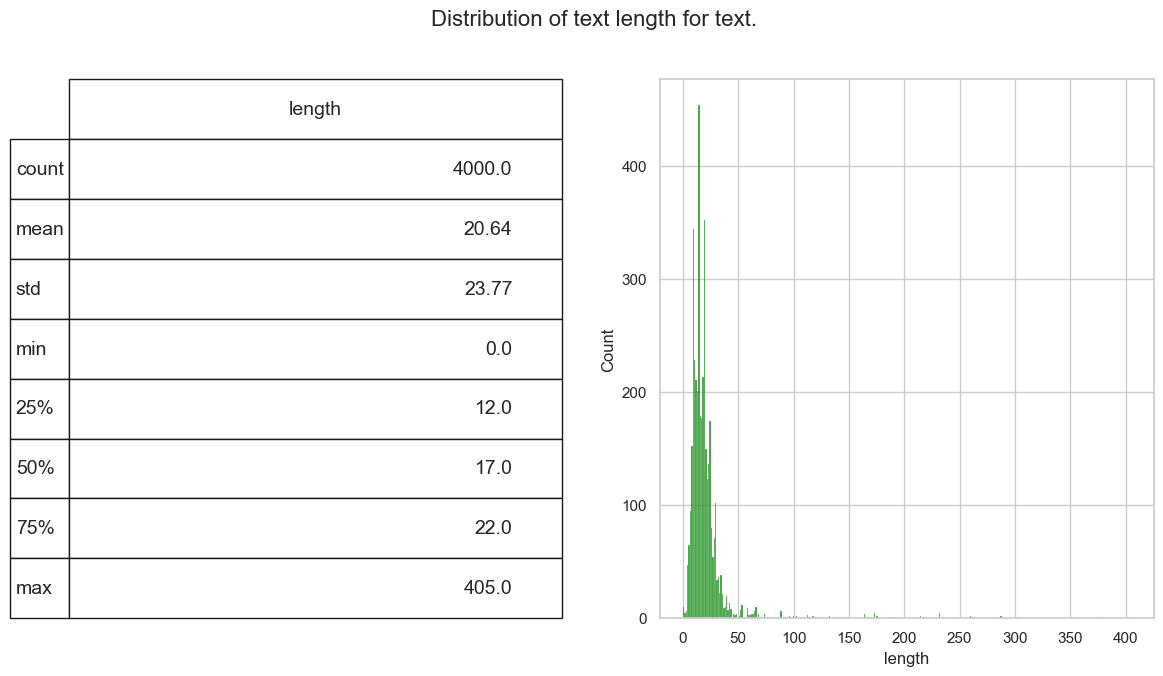

In [105]:
fig = plt.figure(figsize=(14,7))
proc_df['length'] = proc_df["no_stopwords"].str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(proc_df['length'], ax=ax1,color='green')
describe = proc_df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

# Word Clouds

In [91]:
from wordcloud import WordCloud

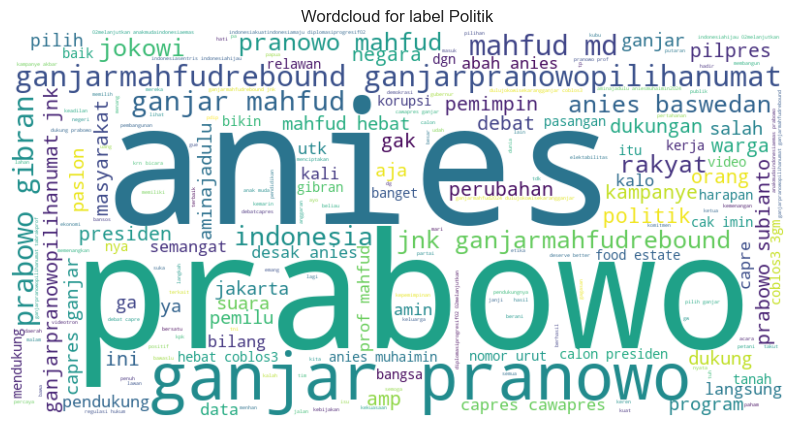

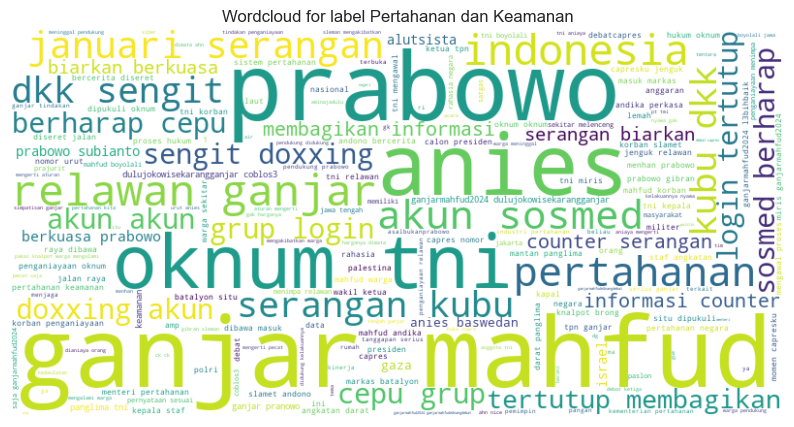

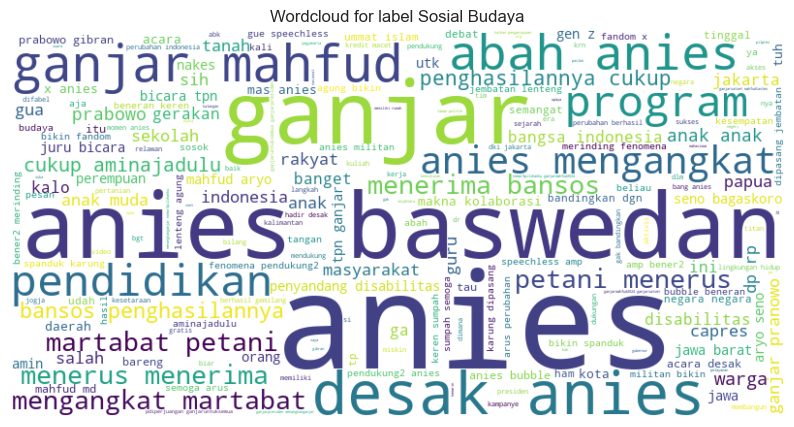

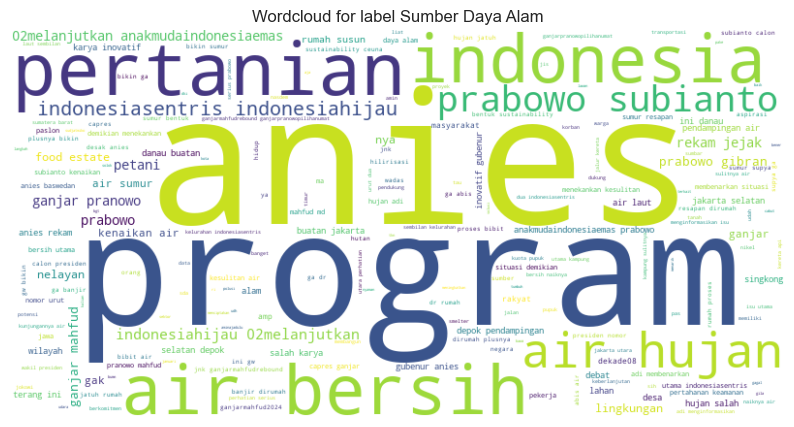

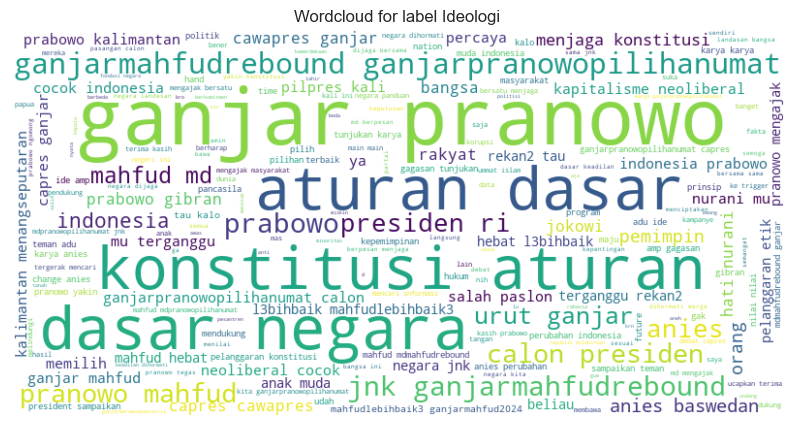

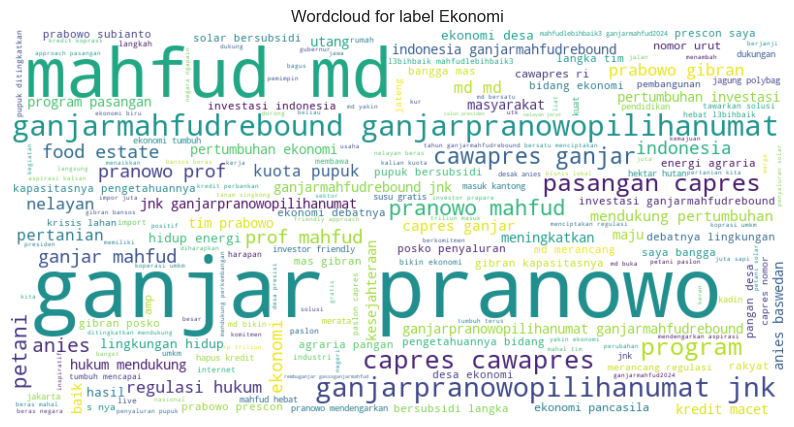

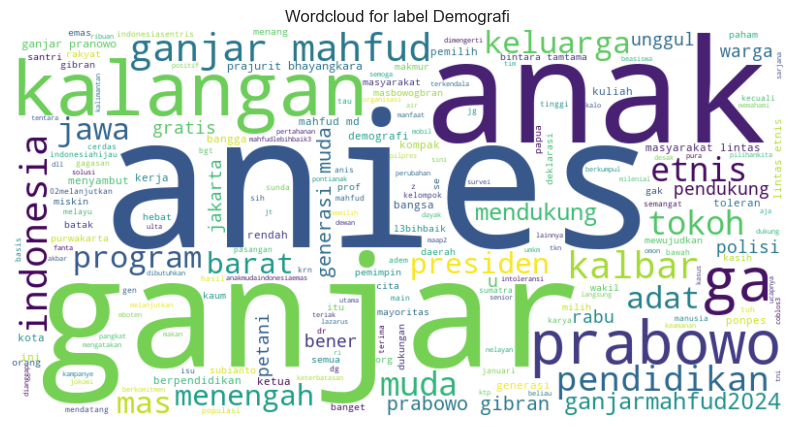

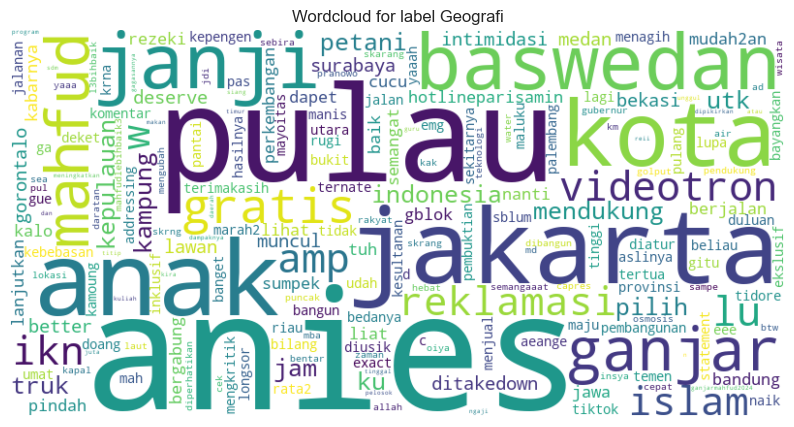

In [106]:
for label in proc_df['label'].unique():
    text = " ".join(proc_df[proc_df['label']==label]['no_stopwords'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud for label {label}")
    plt.show()

# Train Prep

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
x_train, x_test, y_train, y_test = train_test_split(proc_df["no_stopwords"],proc_df["label"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(3000, 46987) (1000, 46987) (3000,) (1000,)


## Transform Function

In [120]:
def transform(data):
    data_counts = count_vect.transform(data)
    data_tfidf = transformer.transform(data_counts)
    return data_tfidf

In [109]:
from catboost import CatBoostClassifier

In [111]:
cb = CatBoostClassifier(task_type="GPU",devices="0:1" ,verbose=False)
cb.fit(x_train_tfidf, y_train)
preds = cb.predict(x_test_tfidf)
print(preds.shape)

(1000, 1)


In [112]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,preds))

                         precision    recall  f1-score   support

              Demografi       1.00      0.12      0.22         8
                Ekonomi       0.76      0.70      0.73        67
               Geografi       0.00      0.00      0.00         4
               Ideologi       0.85      0.46      0.60        76
Pertahanan dan Keamanan       0.84      0.57      0.68        92
                Politik       0.75      0.93      0.83       595
          Sosial Budaya       0.60      0.32      0.42       127
       Sumber Daya Alam       0.55      0.39      0.45        31

               accuracy                           0.74      1000
              macro avg       0.67      0.44      0.49      1000
           weighted avg       0.74      0.74      0.72      1000



c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Predict

In [116]:
out_test = test.copy()
preprocessing(out_test)
out_test.head()

,ID,text,lower,no_link,no_handle,clean_text,no_stopwords,political_tags,politic_terms,social_terms,defense_terms,resource_terms,ideological_terms,economic_terms,demographic_terms,geographic_terms
0,TXT04000,Hebat!! Disabilitas &amp; Emak-emak Deklarasi ...,hebat!! disabilitas &amp; emak-emak deklarasi ...,hebat!! disabilitas &amp; emak-emak deklarasi ...,hebat!! disabilitas &amp; emak-emak deklarasi ...,hebat!! disabilitas &amp; emak-emak deklarasi ...,hebat!! disabilitas &amp; emak-emak deklarasi ...,True,False,True,False,False,False,False,True,False
1,TXT04001,yang gua khawatirkan ini biaya kampanye amin d...,yang gua khawatirkan ini biaya kampanye amin d...,yang gua khawatirkan ini biaya kampanye amin d...,yang gua khawatirkan ini biaya kampanye amin d...,yang gua khawatirkan ini biaya kampanye amin d...,gua khawatirkan biaya kampanye amin dikit bang...,True,True,True,True,False,True,False,True,True
2,TXT04002,Perlindungan hak pekerja migran adalah misi ke...,perlindungan hak pekerja migran adalah misi ke...,perlindungan hak pekerja migran adalah misi ke...,perlindungan hak pekerja migran adalah misi ke...,perlindungan hak pekerja migran adalah misi ke...,perlindungan hak pekerja migran misi kemanusia...,True,True,True,False,True,True,False,False,False
3,TXT04003,emang cuma calon ini yang peduli sama petani d...,emang cuma calon ini yang peduli sama petani d...,emang cuma calon ini yang peduli sama petani d...,emang cuma calon ini yang peduli sama petani d...,emang cuma calon ini yang peduli sama petani d...,"emang calon peduli petani nelayan"" *ganjar hap...",False,False,False,False,True,False,False,False,False
4,TXT04004,"RT Ini bukan cerita tentang Ganjar Mahfud, ini...","rt ini bukan cerita tentang ganjar mahfud, ini...","rt ini bukan cerita tentang ganjar mahfud, ini...","rt ini bukan cerita tentang ganjar mahfud, ini...","ini bukan cerita tentang ganjar mahfud, ini b...","cerita ganjar mahfud, kekuasaan nasib bangsa m...",False,True,True,False,False,True,False,True,False


In [122]:
out_test = transform(out_test['no_stopwords'])
print(out_test.shape)

(1000, 46987)


In [125]:
full_df = preprocessing(train)
full_df = transform(full_df['no_stopwords'])
full_label = pd.concat([y_train,y_test],axis=0)

TypeError: 'NoneType' object is not subscriptable

In [124]:
full_df.head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [119]:
full_df.shape, full_label.shape

((4000, 1), (4000,))

In [121]:
cb.fit(full_df, full_label)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47 stored elements and shape (1, 46987)>
  Coords	Values
  (0, 2690)	0.06776086806065026
  (0, 2751)	0.0723382160281645
  (0, 3068)	0.1683154778085375
  (0, 4871)	0.07164300910860151
  (0, 4942)	0.1683154778085375
  (0, 5790)	0.12498788609858015
  (0, 5795)	0.16010646681794116
  (0, 5954)	0.1134885311258543
  (0, 5970)	0.1683154778085375
  (0, 8161)	0.1683154778085375
  (0, 8162)	0.1683154778085375
  (0, 8984)	0.15428208082928485
  (0, 8985)	0.1683154778085375
  (0, 9160)	0.08273937279613344
  (0, 9238)	0.1683154778085375
  (0, 9432)	0.10667634375579522
  (0, 9447)	0.1402486838500322
  (0, 9601)	0.09058226328113328
  (0, 9604)	0.09193249099565104
  (0, 12259)	0.15428208082928485
  (0, 12261)	0.1683154778085375
  (0, 13432)	0.10483453711894476
  (0, 13438)	0.1683154778085375
  (0, 16655)	0.11282467125098232
  (0, 16675)	0.1683154778085375
  (0, 16725)	0.060645287190973146
  (0, 16910)	0.1683154778085375
  (0, 19116)	0.10870262467329403
  (0, 19137)	0.16010646681794116
  (0, 27019)	0.16010646681794116
  (0, 27020)	0.1683154778085375
  (0, 27932)	0.12752192810510696
  (0, 27936)	0.1683154778085375
  (0, 27996)	0.1683154778085375
  (0, 27997)	0.1683154778085375
  (0, 28870)	0.15428208082928485
  (0, 28872)	0.1683154778085375
  (0, 33233)	0.09692109214007484
  (0, 33242)	0.1683154778085375
  (0, 35627)	0.1421524711230111
  (0, 35651)	0.1683154778085375
  (0, 35657)	0.1683154778085375
  (0, 39647)	0.1683154778085375
  (0, 39648)	0.1683154778085375
  (0, 40746)	0.13041913522532242
  (0, 46642)	0.1683154778085375
  (0, 46643)	0.1683154778085375": Cannot convert obj <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 47 stored elements and shape (1, 46987)>
  Coords	Values
  (0, 2690)	0.06776086806065026
  (0, 2751)	0.0723382160281645
  (0, 3068)	0.1683154778085375
  (0, 4871)	0.07164300910860151
  (0, 4942)	0.1683154778085375
  (0, 5790)	0.12498788609858015
  (0, 5795)	0.16010646681794116
  (0, 5954)	0.1134885311258543
  (0, 5970)	0.1683154778085375
  (0, 8161)	0.1683154778085375
  (0, 8162)	0.1683154778085375
  (0, 8984)	0.15428208082928485
  (0, 8985)	0.1683154778085375
  (0, 9160)	0.08273937279613344
  (0, 9238)	0.1683154778085375
  (0, 9432)	0.10667634375579522
  (0, 9447)	0.1402486838500322
  (0, 9601)	0.09058226328113328
  (0, 9604)	0.09193249099565104
  (0, 12259)	0.15428208082928485
  (0, 12261)	0.1683154778085375
  (0, 13432)	0.10483453711894476
  (0, 13438)	0.1683154778085375
  (0, 16655)	0.11282467125098232
  (0, 16675)	0.1683154778085375
  (0, 16725)	0.060645287190973146
  (0, 16910)	0.1683154778085375
  (0, 19116)	0.10870262467329403
  (0, 19137)	0.16010646681794116
  (0, 27019)	0.16010646681794116
  (0, 27020)	0.1683154778085375
  (0, 27932)	0.12752192810510696
  (0, 27936)	0.1683154778085375
  (0, 27996)	0.1683154778085375
  (0, 27997)	0.1683154778085375
  (0, 28870)	0.15428208082928485
  (0, 28872)	0.1683154778085375
  (0, 33233)	0.09692109214007484
  (0, 33242)	0.1683154778085375
  (0, 35627)	0.1421524711230111
  (0, 35651)	0.1683154778085375
  (0, 35657)	0.1683154778085375
  (0, 39647)	0.1683154778085375
  (0, 39648)	0.1683154778085375
  (0, 40746)	0.13041913522532242
  (0, 46642)	0.1683154778085375
  (0, 46643)	0.1683154778085375 to float

In [126]:
fin_preds = cb.predict(out_test)
print(fin_preds.shape)

(1000, 1)


In [129]:
fin_preds = fin_preds.flatten()
fin_preds[:5]

array(['Politik', 'Sosial Budaya', 'Politik', 'Politik', 'Politik'],
      dtype=object)

In [130]:
fin = pd.DataFrame({'ID':test['ID'],'label':fin_preds})
fin.head()

,ID,label
0,TXT04000,Politik
1,TXT04001,Sosial Budaya
2,TXT04002,Politik
3,TXT04003,Politik
4,TXT04004,Politik


In [131]:
fin.to_csv("submission.csv",index=False)